In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
import datetime
now = datetime.datetime.now()
date = str(now).split(' ')[0]
time_str = f'{date} 05:30:00'
time = datetime.datetime.strptime(time_str, '%Y-%m-%d %H:%M:%S')
curr_time = round(time.timestamp())

In [71]:
periods = {
   '%5ENSEI':{
        'period1':1189987200,
        'period2':curr_time,
    },
   'RELIANCE.NS':{
      'period1':820454400,
      'period2':curr_time,
   }
}

In [72]:
!pip install fake_useragent
import requests
from fake_useragent import UserAgent

def download_file(stock_name):
    global curr_time
    ua_str = UserAgent().chrome
    file_url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock_name}?period1={periods[stock_name]['period1']}&period2={curr_time}&interval=1d&events=history&includeAdjustedClose=true"
    r = requests.get(file_url, headers={'User-Agent':ua_str})

    with open (stock_name+'.csv', 'wb') as f:
        f.write(r.content)

In [73]:
# stock_name = '%5ENSEI'
stock_name = 'RELIANCE.NS'
download_file(stock_name)

In [74]:
df = pd.read_csv(stock_name+'.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7021,2023-11-24,2391.600098,2402.600098,2391.050049,2393.899902,2393.899902,3374743.0
7022,2023-11-28,2393.899902,2399.699951,2375.250000,2394.399902,2394.399902,6896087.0
7023,2023-11-29,2408.000000,2411.949951,2398.050049,2400.699951,2400.699951,6265653.0
7024,2023-11-30,2394.699951,2400.699951,2369.899902,2377.449951,2377.449951,14219992.0
7025,2023-12-01,2378.000000,2396.399902,2377.600098,2394.300049,2394.300049,7171421.0


In [75]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-11-24,2023-11-24,2391.600098,2402.600098,2391.050049,2393.899902,2393.899902,3374743.0
2023-11-28,2023-11-28,2393.899902,2399.699951,2375.250000,2394.399902,2394.399902,6896087.0
2023-11-29,2023-11-29,2408.000000,2411.949951,2398.050049,2400.699951,2400.699951,6265653.0
2023-11-30,2023-11-30,2394.699951,2400.699951,2369.899902,2377.449951,2377.449951,14219992.0
2023-12-01,2023-12-01,2378.000000,2396.399902,2377.600098,2394.300049,2394.300049,7171421.0


In [76]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7016.000000,7016.000000,7016.000000,7016.000000,7016.000000,7.016000e+03
mean,604.483421,611.477420,596.927102,603.916817,582.734788,2.835404e+07
std,733.118351,740.370002,725.285015,732.524621,732.293788,4.789658e+07
min,11.836550,11.890704,11.763055,11.890704,7.799749,0.000000e+00
25%,52.620426,53.380520,51.945435,52.488911,40.977463,6.536111e+06
50%,417.393524,422.953323,412.168045,416.724853,384.842514,1.185425e+07
75%,637.829025,648.406875,624.839630,636.014969,578.613724,2.985669e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,6.686620e+08


In [77]:
dataset = pd.DataFrame(df[['Close']])
dataset.tail()

,Close
Date,
2023-11-24,2393.899902
2023-11-28,2394.399902
2023-11-29,2400.699951
2023-11-30,2377.449951
2023-12-01,2394.300049


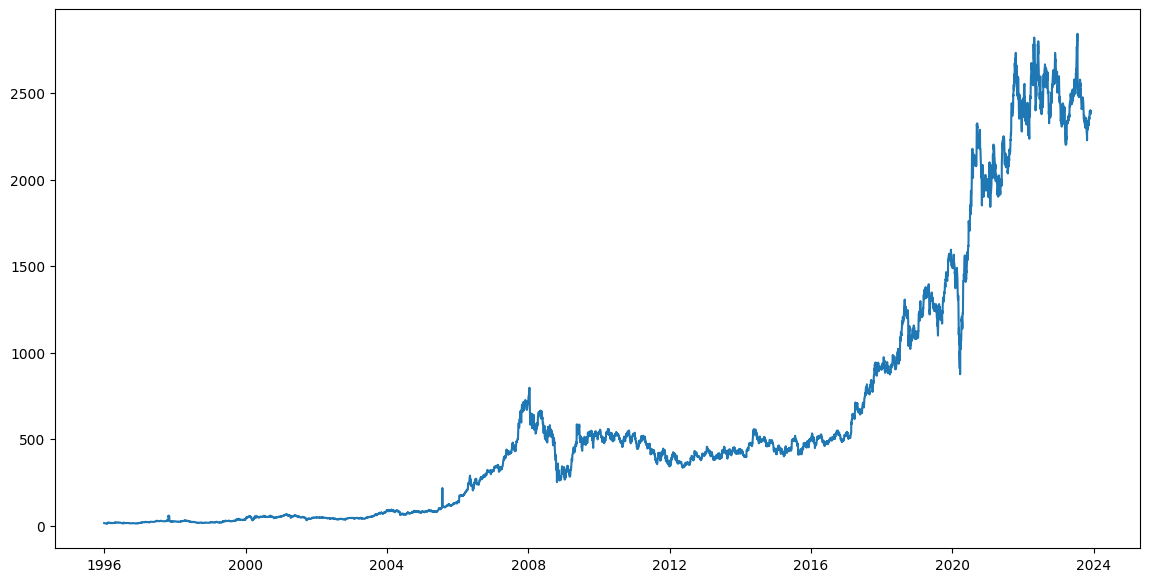

In [78]:
plt.figure(figsize=(14,7))
plt.plot(dataset,label='Close Price history')

In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7026 entries, 1996-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7016 non-null   float64
dtypes: float64(1)
memory usage: 109.8 KB


# Data Preprocessing

In [80]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7016 entries, 1996-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7016 non-null   float64
dtypes: float64(1)
memory usage: 109.6 KB


In [81]:
dataset.tail()

,Close
Date,
2023-11-24,2393.899902
2023-11-28,2394.399902
2023-11-29,2400.699951
2023-11-30,2377.449951
2023-12-01,2394.300049


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data[:5]

array([[0.0014229 ],
       [0.00137916],
       [0.00142153],
       [0.00136959],
       [0.00133132]])

In [83]:
window_size = 60

x_data, y_data = [],[]

for i in range(window_size, len(scaled_data)):
    x_data.append(scaled_data[i-window_size:i,0])
    y_data.append(scaled_data[i,0])

x_data, y_data = np.array(x_data), np.array(y_data)

x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))
y_data = np.reshape(y_data, (y_data.shape[0], 1))

x_data.shape, y_data.shape

((6956, 60, 1), (6956, 1))

In [84]:
train_size = 0.8

x_train, x_test = x_data[:(int)(len(x_data)*train_size)], x_data[(int)(len(x_data)*train_size):]
y_train, y_test = y_data[:(int)(len(y_data)*train_size)], y_data[(int)(len(y_data)*train_size):]

y_original = dataset[window_size + len(y_train):]

x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_original.shape

((5564, 60, 1), (5564, 1), (1392, 60, 1), (1392, 1), (1392, 1))

# Create Model

In [85]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=2)

Epoch 1/5
44/44 - 21s - loss: 0.0176 - mae: 0.0176 - 21s/epoch - 479ms/step
Epoch 2/5
44/44 - 5s - loss: 0.0040 - mae: 0.0040 - 5s/epoch - 104ms/step
Epoch 3/5
44/44 - 4s - loss: 0.0037 - mae: 0.0037 - 4s/epoch - 99ms/step
Epoch 4/5
44/44 - 6s - loss: 0.0037 - mae: 0.0037 - 6s/epoch - 141ms/step
Epoch 5/5
44/44 - 4s - loss: 0.0035 - mae: 0.0035 - 4s/epoch - 99ms/step


dict_keys(['loss', 'mae'])


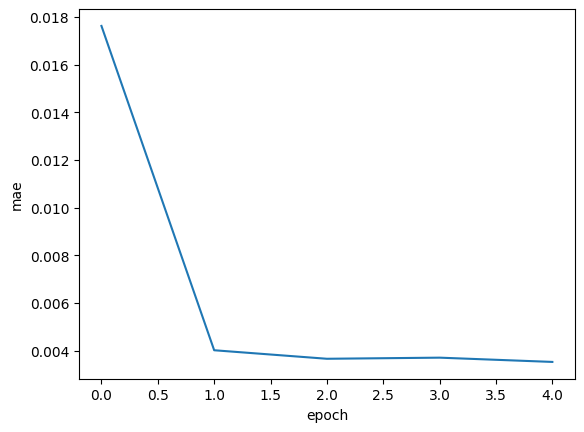

In [87]:
print(history.history.keys())
plt.plot(history.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [88]:
model.save("model.h5")

# Testing

In [89]:
y_pred = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_pred)

44/44 [==============================] - 2s 17ms/step


In [90]:
print('MAE Loss: ', tf.get_static_value(sum(keras.losses.mae(y_test, y_pred))/len(y_pred)))

print('MAPE Loss: ', tf.get_static_value(sum(keras.losses.mape(y_original, y_predicted)) / len(y_original)))

MAE Loss:  0.022382157
MAPE Loss:  3.311281


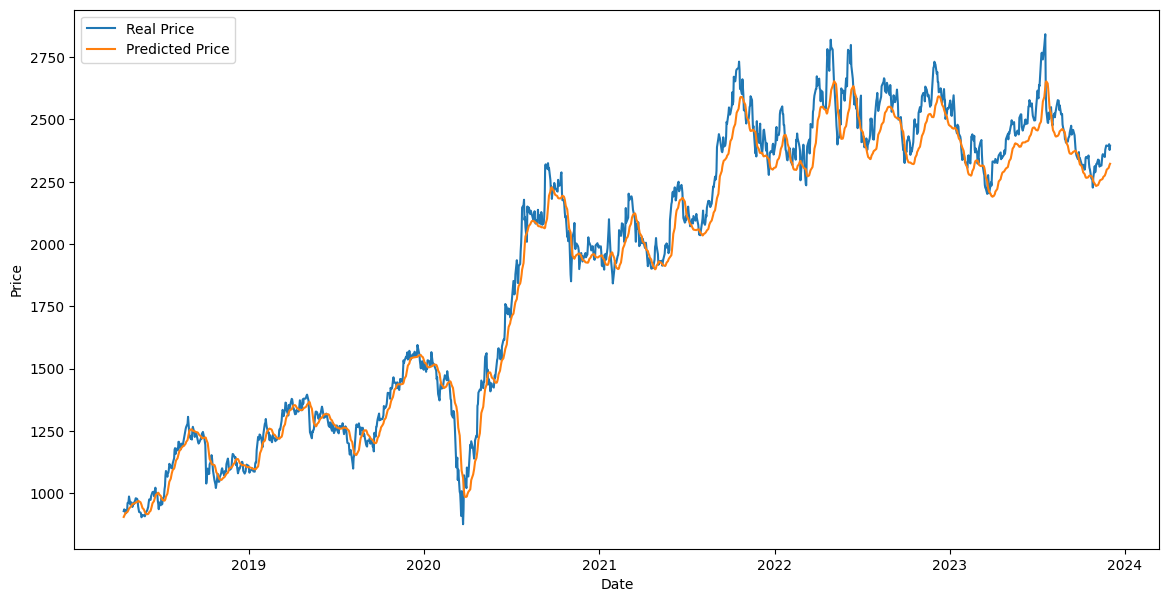

In [91]:

validation = y_original
validation['Predictions'] = y_predicted

plt.figure(figsize=(14,7))
plt.plot(validation['Close'], label="Real Price")
plt.plot(validation['Predictions'], label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()